# Introduction
This data analysis provides a overview of Netflix content and revealing some patterns i what they prioritizes.

# Importing Libraries

In [17]:
import pandas as pd # Data handling pandas
import matplotlib.pyplot as plt # Visualization with matplot
import seaborn as sns # Visualization with seaborn

Enabling Inline plots, Loading dataset and showing the first few rows

In [29]:
# Enabling Inline plotting
%matplotlib inline
df = pd.read_csv("Netflix Datasets Evaluation MS Excel.csv") # load dataset
df.head() #print

,show_id,type,title,director,cast,country,date_added,date_added.1,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",25-09-2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",24-09-2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",24-09-2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",24-09-2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",24-09-2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Cleaning the Data

In [30]:
df = df.drop(columns=["date_added.1"], errors='ignore') # Remove any duplicate column named 'date_added.1'
df = df.drop_duplicates() # Drop duplicate rows
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce') # Convert the 'date_added' column to datetime format
df['year_added'] = df['date_added'].dt.year # Extract year from the 'date_added' column
df['month_added'] = df['date_added'].dt.month # Extract month from the 'date_added' column
df['duration_num'] = df['duration'].str.extract(r'(\d+)').astype(float) # Extract numeric part from 'duration' (90 from 90 mins)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)') # Extract text part from 'duration' (mins from 90 mins)
df[['type', 'title', 'release_year', 'year_added', 'duration_num', 'duration_type']].head() # Preview columns after cleaning


,type,title,release_year,year_added,duration_num,duration_type
0,Movie,Dick Johnson Is Dead,2020,2021.0,90.0,min
1,TV Show,Blood & Water,2021,2021.0,2.0,Seasons
2,TV Show,Ganglands,2021,2021.0,1.0,Season
3,TV Show,Jailbirds New Orleans,2021,2021.0,1.0,Season
4,TV Show,Kota Factory,2021,2021.0,2.0,Seasons


Figure 1: Distribution of Content Types on Netflix

<ipython-input-42-e1f0b44a2fc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2') #plot content types


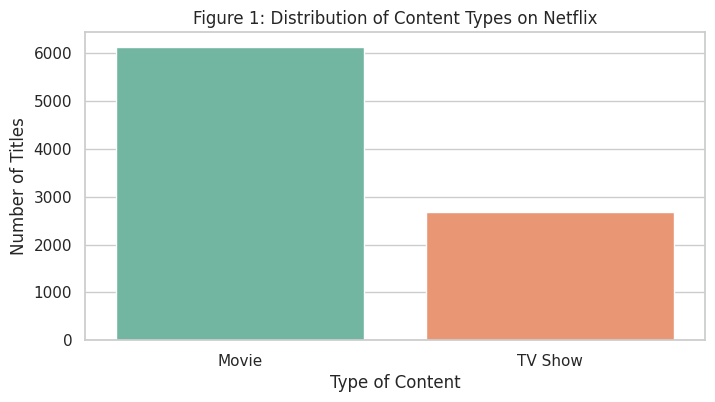

In [42]:
sns.set(style="whitegrid") #setting seaborn theme
plt.figure(figsize=(8, 4)) #set figure size
sns.countplot(data=df, x='type', palette='Set2') #plot content types
plt.title("Figure 1: Distribution of Content Types on Netflix") # add title
plt.xlabel("Type of Content") # add x axis label
plt.ylabel("Number of Titles") # add y axis label
plt.show() #print


Figure 2: Number of Titles Added to Netflix Each Year

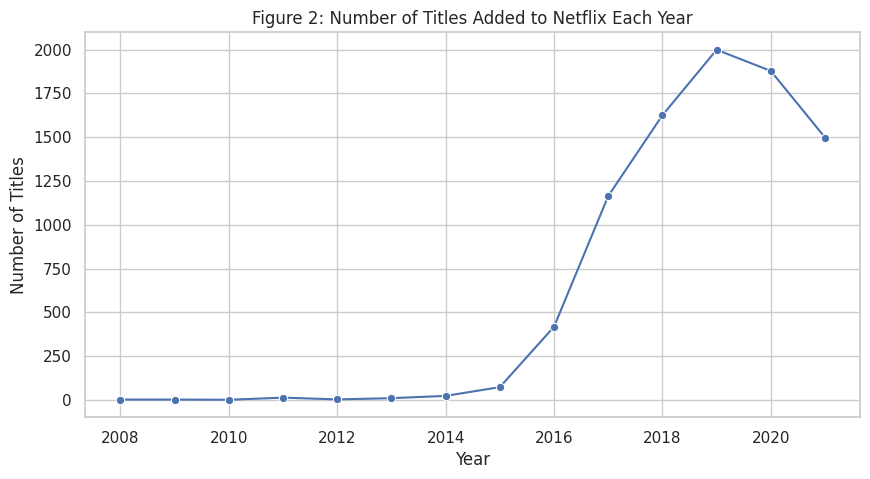

In [43]:
plt.figure(figsize=(10, 5)) #set figure size
year_counts = df['year_added'].value_counts().sort_index() #count how many titles added every year
sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o") # plot trend over time
plt.title("Figure 2: Number of Titles Added to Netflix Each Year") # add title
plt.xlabel("Year") # add x axis label
plt.ylabel("Number of Titles") # add y axis label
plt.grid(True) # add grid
plt.show() #print


Figure 3: Top 10 Countries Producing Netflix Content

<ipython-input-44-cb6ac97877f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r') # create a horizontal bar plot


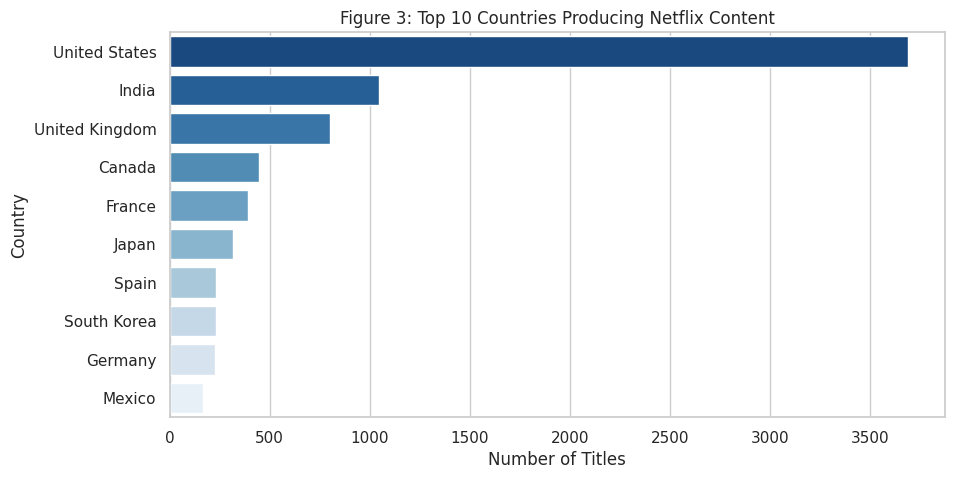

In [44]:
plt.figure(figsize=(10, 5)) #set figure size
top_countries = df['country'].dropna().str.split(', ').explode().value_counts().head(10) # split countries by comma, explode into rows, and get top 10
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r') # create a horizontal bar plot
plt.title("Figure 3: Top 10 Countries Producing Netflix Content") # add title
plt.xlabel("Number of Titles") # add x axis label
plt.ylabel("Country") # add y axis label
plt.show() #print


Figure 4: Distribution of Content Ratings

<ipython-input-45-55cd7edb5b9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=rating_order, palette='muted') # plot count of ratings


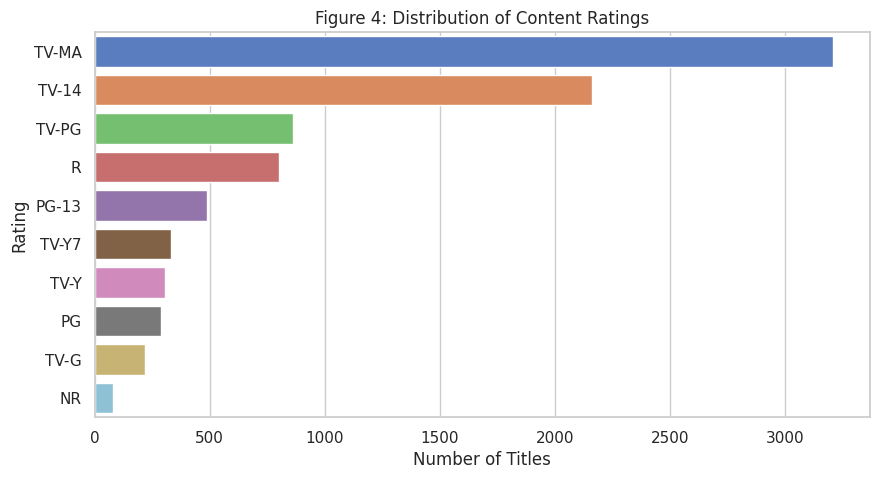

In [45]:
plt.figure(figsize=(10, 5)) #set figure size
rating_order = df['rating'].value_counts().head(10).index # get top 10 ratings by count
sns.countplot(data=df, y='rating', order=rating_order, palette='muted') # plot count of ratings
plt.title("Figure 4: Distribution of Content Ratings") # add title
plt.xlabel("Number of Titles") # add x axis label
plt.ylabel("Rating") # add y axis label
plt.show() #print


Figure 5: Top 10 Netflix Genres

<ipython-input-46-13fd55ebe380>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='dark') # creating a horizontal bar plot of top genres


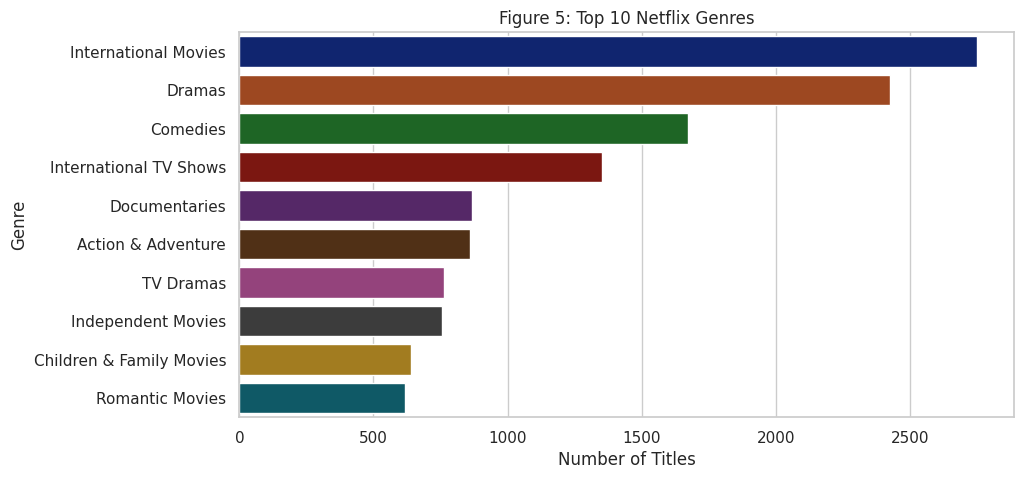

In [46]:
plt.figure(figsize=(10, 5)) #set figure size
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10) # split listed_in by comma, explode into rows, and get top 10
sns.barplot(x=top_genres.values, y=top_genres.index, palette='dark') # creating a horizontal bar plot of top genres
plt.title("Figure 5: Top 10 Netflix Genres") # add title
plt.xlabel("Number of Titles") # add x axis label
plt.ylabel("Genre") # add y axis label
plt.show() #print


Figure 6 : Distribution of Movie Durations & Figure 7: Distribution of TV Show Seasons

<ipython-input-47-f9a582b3a84f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=tv_durations, order=tv_durations.value_counts().index, palette='Oranges_r')


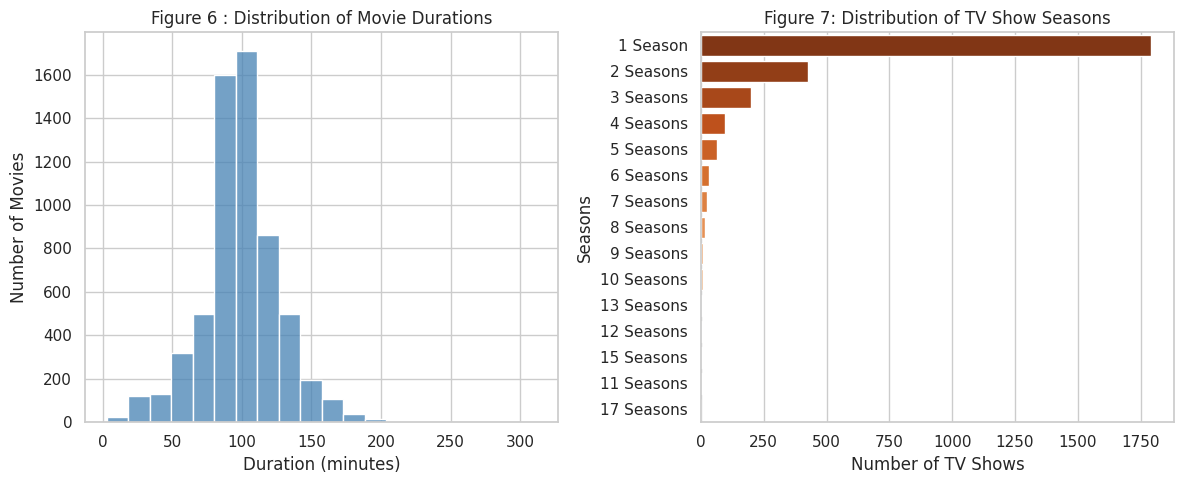

In [47]:
plt.figure(figsize=(12, 5)) #set figure size

# Histogram of Movie Time
plt.subplot(1, 2, 1)
movie_durations = df[df['type'] == 'Movie']['duration_num'].dropna()
sns.histplot(movie_durations, bins=20, color='steelblue')
plt.title("Figure 6 : Distribution of Movie Durations") # add title
plt.xlabel("Duration (minutes)") # add x axis label
plt.ylabel("Number of Movies") # add y axis label

# Countplot for TV Show seasons
plt.subplot(1, 2, 2)
tv_durations = df[df['type'] == 'TV Show']['duration'].dropna()
sns.countplot(y=tv_durations, order=tv_durations.value_counts().index, palette='Oranges_r')
plt.title("Figure 7: Distribution of TV Show Seasons") # add title
plt.xlabel("Number of TV Shows") # add x axis label
plt.ylabel("Seasons") # add y axis label

plt.tight_layout() # adjusting so labels dont overlap
plt.show() #print

# Conclusion
What we can see with this analysis of the dataset is, that Netflix focuses more on movies than TV-Shows seen on figure 1: Distribution of Content Types on Netflix, and that Netflix added most content between 2017-2020 as seen on Figure 2: Number of Titles Added to Netflix Each Year. We can also conclude that US dominates the production of netflix shows as seen on Figure 3: Top 10 Countries Producing Netflix Content, where India and UK is second and Third.

On Figure 4: Distribution of Content Ratings, we can see that Netflix focuses most on content rated for mature audiences TV-MA and TV-14. And on Figure 5: Top 10 Netflix Genres we can see what genres Netflix added most of being Dramas, Comedies and International content. Lastly we can see on Figure 6 : Distribution of Movie Durations & Figure 7: Distribution of TV Show Seasons that Movies more variable duration, while TV shows often follows the same 1-3 structure.